In [1]:
import pymaid
import navis as nv
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.axes as axx
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=22)
import time
from navis.interfaces import neuprint as nvneu
from neuroboom import dendrogram as nbd
import neuroboom as nb
import seaborn as sns

In [2]:
#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"")


INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [3]:
#get ya neuron
neuron = pymaid.get_neuron(873)

In [4]:
#get connector IDs
con_details = pymaid.get_connector_details(neuron)
con_details_sub=con_details.explode("postsynaptic_to")
con_details_sub=con_details_sub[con_details_sub["postsynaptic_to"]==295]


#color dictionary
id_to_color = dict(zip([295], sns.color_palette('RdPu_r', 1)))

#map to the neuron
connector_id_to_neuron = dict(zip(con_details_sub.connector_id, con_details_sub.postsynaptic_to))
connector_id_to_color = {i : id_to_color[connector_id_to_neuron[i]] for i in con_details_sub.connector_id}

CN details:   0%|          | 0/693 [00:00<?, ?it/s]

INFO  : Data for 693 of 693 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 5s


<Figure size 640x480 with 0 Axes>

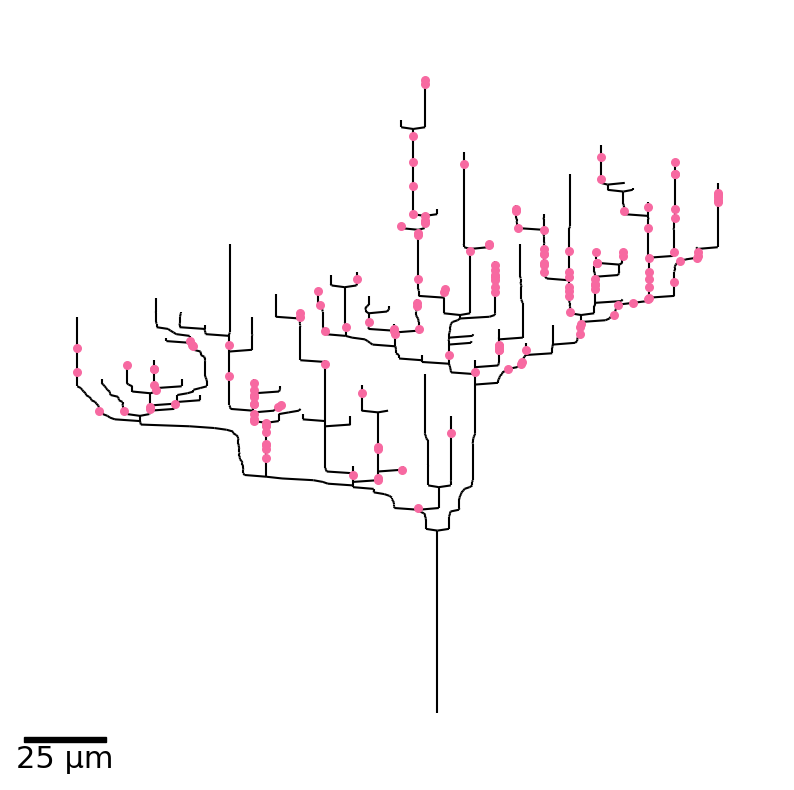

In [5]:
#plot the dendrogram
plt.clf()
fig, ax= plt.subplots(figsize = (10,10))
nbd.plot_dendrogram(neuron, fragment='true', prog='dot', linewidth=1.5, highlight_connectors = connector_id_to_color, highlight_connector_size=30)
scalebar = AnchoredSizeBar(ax.transData, 300, '25 µm', 'lower left', pad=0.1, color='black', frameon=False, size_vertical=200, fontproperties=fontprops)
ax.add_artist(scalebar)
plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_md1feedforward.svg', format="svg")
plt.show()


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

CN details:   0%|          | 0/693 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Data for 693 of 693 unique connector IDs retrieved (pymaid)


Plotting Tree...
Plotting connectors...
Completed in 6s


<Figure size 640x480 with 0 Axes>

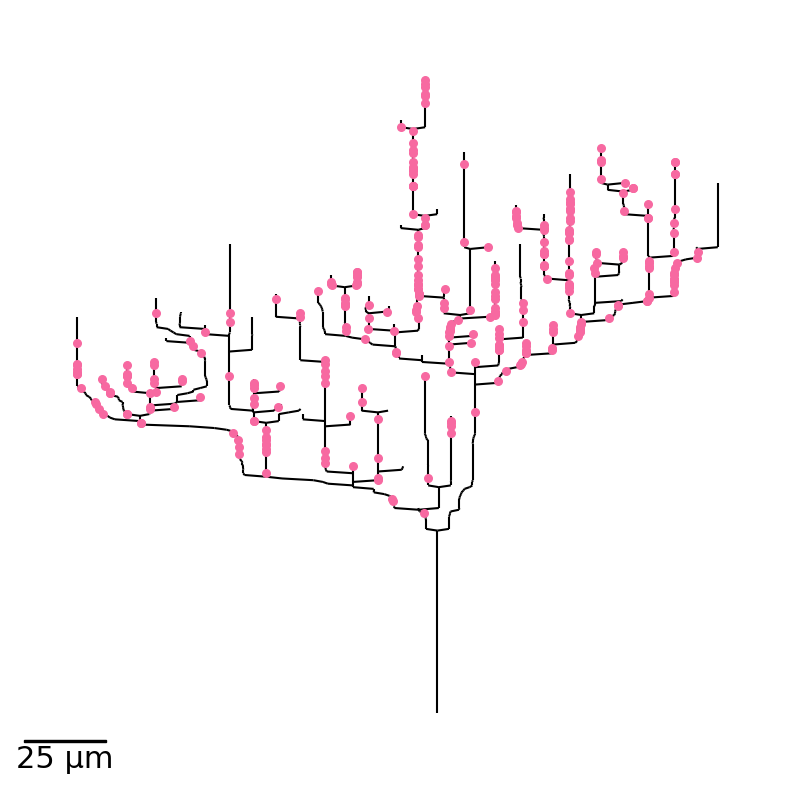

In [6]:
#get recurrent OSNs
MD1OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD1osns=pymaid.get_neuron(MD1OSNs)

#For recurrent connections, get connector IDs
con_details = pymaid.get_connector_details(neuron)
con_details_sub=con_details.explode("postsynaptic_to")
con_details_recurrent=con_details_sub[con_details_sub["postsynaptic_to"].isin(MD1OSNs)]

recurrent_color=sns.color_palette('RdPu_r', 1)*46
recurrent_id_to_color= dict(zip(MD1OSNs, recurrent_color))


#map to the neuron
recurrent_connector_id_to_neuron = dict(zip(con_details_recurrent.connector_id, con_details_recurrent.postsynaptic_to))
recurrent_connector_id_to_color = {i : recurrent_id_to_color[recurrent_connector_id_to_neuron[i]] for i in con_details_recurrent.connector_id}


#plot the dendrogram
plt.clf()
fig, ax= plt.subplots(figsize = (10,10))
nbd.plot_dendrogram(neuron, fragment='true', prog='dot', linewidth=1.5, highlight_connectors = recurrent_connector_id_to_color, highlight_connector_size=30)
scalebar = AnchoredSizeBar(ax.transData, 300, '25 µm', 'lower left', pad=0.1, color='black', frameon=False, size_vertical=100, fontproperties=fontprops)
ax.add_artist(scalebar)

plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_md1recurrent.svg', format="svg")
plt.show()

In [7]:
nbd.plot_dendrogram??

Signature:
nbd.plot_dendrogram(
    x: Union[navis.core.skeleton.TreeNeuron, navis.core.neuronlist.NeuronList],
    heal_neuron: bool = False,
    downsample_neuron: float = 0.0,
    plot_connectors: bool = True,
    connector_confidence: Tuple[float, float] = (0.0, 0.0),
    highlight_nodes: Optional = None,
    highlight_connectors: Optional = None,
    fragment: bool = False,
    presyn_color: List[List[float]] = [[0.9, 0.0, 0.0]],
    postsyn_color: List[List[float]] = [[0.0, 0.0, 0.9]],
    highlight_connector_color: List[List[float]] = [[0.0, 0.9, 0.0]],
    highlight_connector_size: int = 20,
    presyn_size: float = 0.1,
    postsyn_size: float = 0.1,
    prog: str = 'dot',
    node_size: int = 0,
    linewidth: float = 0.25,
)
Source:   
def plot_dendrogram(
    x: Union[navis.TreeNeuron, navis.NeuronList],
    heal_neuron: bool = False,
    downsample_neuron: float = 0.0,
    plot_connectors: bool = True,
    connector_confidence: Tuple[float, float] = (0.0, 0.0),
    highlig